# Prometheus Metrics Analysis with Machine learning algorithms

## Goal
1. To collect data from prometheus, polish data in a format that could be feed into ML models for training and etc to gain a better insight on the metrics
2. To figure out what metrics change based on a different system environment. 
3. To generate plots that would give us better insights on metrics.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (18,16)

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import preprocessing


import datetime
import time
import numpy as np
import json

## Test each piece

In [1]:
r = requests.get('http://localhost:9090/api/v1/label/__name__/values')

NameError: name 'requests' is not defined

In [236]:
metrics_name = pd.read_json(r.text).data #.drop(145).reset_index(drop=True)

In [238]:
print(metrics_name)

0                            builder_builds_failed_total
1                         builder_builds_triggered_total
2         engine_daemon_container_actions_seconds_bucket
3          engine_daemon_container_actions_seconds_count
4            engine_daemon_container_actions_seconds_sum
5              engine_daemon_container_states_containers
6                         engine_daemon_engine_cpus_cpus
7                              engine_daemon_engine_info
8                      engine_daemon_engine_memory_bytes
9                 engine_daemon_events_subscribers_total
10                            engine_daemon_events_total
11              engine_daemon_health_checks_failed_total
12                     engine_daemon_health_checks_total
13          engine_daemon_network_actions_seconds_bucket
14           engine_daemon_network_actions_seconds_count
15             engine_daemon_network_actions_seconds_sum
16     etcd_debugging_snap_save_marshalling_duration_...
17     etcd_debugging_snap_save

## Convert and set time range

In [239]:
time.time()

1502106012.830539

In [240]:
endTime = datetime.datetime.now()
startTime = endTime - datetime.timedelta(minutes=5)

In [241]:
startTimeUnix = time.mktime(startTime.timetuple()) + startTime.microsecond / 1E6

In [242]:
startTimeUnix

1502105712.836156

## Construct URL

In [243]:
baseUrl = 'http://localhost:9090'
queryRangeUrl = 'query_range'
seriesUrl = 'series'

In [244]:
queryString='process_cpu_seconds_total'

In [245]:
queryRangeParams = '?query=%s&time=%s' %(queryString, startTimeUnix)

In [246]:
queryRangeParams

'?query=process_cpu_seconds_total&time=1502105712.836156'

## Convert DateTime to Time

In [247]:
def toUnixTime(dt):
    return time.mktime(dt.timetuple()) + dt.microsecond / 1E6

## Construct URL 

In [248]:
def constructUrl(apiPoint, querySting, startTime, endTime, resolution):
    url = 'http://localhost:9090/api/v1/'
    url += apiPoint + '?' + 'query=%s' %querySting
    timeUrl = '&start=%s&end=%s' %(toUnixTime(startTime), toUnixTime(endTime))
    stepUrl = '&step=%s' %(resolution)
    return url + timeUrl + stepUrl

In [249]:
testUrl = constructUrl(queryRangeUrl, "http_request_duration_microseconds", startTime, endTime, 1)

In [250]:
testUrl

'http://localhost:9090/api/v1/query_range?query=http_request_duration_microseconds&start=1502105712.836156&end=1502106012.836156&step=1'

In [251]:
r = requests.get(testUrl)

In [252]:
resultList = r.json()['data']['result'][0]['values']

In [253]:
resultList

[[1502105712.836, 'NaN'],
 [1502105713.836, 'NaN'],
 [1502105714.836, 'NaN'],
 [1502105715.836, 'NaN'],
 [1502105716.836, 'NaN'],
 [1502105717.836, 'NaN'],
 [1502105718.836, 'NaN'],
 [1502105719.836, 'NaN'],
 [1502105720.836, 'NaN'],
 [1502105721.836, 'NaN'],
 [1502105722.836, 'NaN'],
 [1502105723.836, 'NaN'],
 [1502105724.836, 'NaN'],
 [1502105725.836, 'NaN'],
 [1502105726.836, 'NaN'],
 [1502105727.836, 'NaN'],
 [1502105728.836, 'NaN'],
 [1502105729.836, 'NaN'],
 [1502105730.836, 'NaN'],
 [1502105731.836, 'NaN'],
 [1502105732.836, 'NaN'],
 [1502105733.836, 'NaN'],
 [1502105734.836, 'NaN'],
 [1502105735.836, 'NaN'],
 [1502105736.836, 'NaN'],
 [1502105737.836, 'NaN'],
 [1502105738.836, 'NaN'],
 [1502105739.836, 'NaN'],
 [1502105740.836, 'NaN'],
 [1502105741.836, 'NaN'],
 [1502105742.836, 'NaN'],
 [1502105743.836, 'NaN'],
 [1502105744.836, 'NaN'],
 [1502105745.836, 'NaN'],
 [1502105746.836, 'NaN'],
 [1502105747.836, 'NaN'],
 [1502105748.836, 'NaN'],
 [1502105749.836, 'NaN'],
 [1502105750

In [254]:
df1 = pd.DataFrame(resultList, columns=["time", "feature"]).set_index('time')

In [255]:
testUrl2 = constructUrl(queryRangeUrl, 'go_threads', startTime, endTime, 1)
r2 = requests.get(testUrl2)

In [256]:
resultList2 = r2.json()['data']['result'][0]['values']
df2 = pd.DataFrame(resultList2, columns=["time", "feature1"]).set_index('time')

In [257]:
df2['feature1']

time
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
                ..
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.502106e+09    12
1.50210

In [258]:
pd.concat([df1, df2], axis=1)

,feature,feature1
time,,
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12
1.502106e+09,NaN,12


# Actual Data

In [259]:
queryRangeUrl = 'query_range'

def getFeatures(durMs):
    df = pd.DataFrame()
    endTime = datetime.datetime.now()
    startTime = endTime - datetime.timedelta(seconds=durMs)
    for i, metric_name in enumerate(metrics_name):
        print(metric_name)
        url = constructUrl(queryRangeUrl, metric_name, startTime, endTime, 1)
        r = requests.get(url)
        valueList = r.json()['data']['result'][0]['values']
        if valueList[0][1] != 'NaN':
            temp_df = pd.DataFrame(valueList, columns=["time", i]).set_index('time').apply(pd.to_numeric)
            df = pd.concat([df, temp_df], axis= 1)
    
    return df.fillna(0)

In [260]:
df = getFeatures(60)

builder_builds_failed_total
builder_builds_triggered_total
engine_daemon_container_actions_seconds_bucket
engine_daemon_container_actions_seconds_count
engine_daemon_container_actions_seconds_sum
engine_daemon_container_states_containers
engine_daemon_engine_cpus_cpus
engine_daemon_engine_info
engine_daemon_engine_memory_bytes
engine_daemon_events_subscribers_total
engine_daemon_events_total
engine_daemon_health_checks_failed_total
engine_daemon_health_checks_total
engine_daemon_network_actions_seconds_bucket
engine_daemon_network_actions_seconds_count
engine_daemon_network_actions_seconds_sum
etcd_debugging_snap_save_marshalling_duration_seconds_bucket
etcd_debugging_snap_save_marshalling_duration_seconds_count
etcd_debugging_snap_save_marshalling_duration_seconds_sum
etcd_debugging_snap_save_total_duration_seconds_bucket
etcd_debugging_snap_save_total_duration_seconds_count
etcd_debugging_snap_save_total_duration_seconds_sum
etcd_disk_wal_fsync_duration_seconds_bucket
etcd_disk_wal_f

In [261]:
#df.to_csv('pandas.csv', sep='\t')

In [ ]:
threshold= 0.01
df = df.drop(df.std()[df.std() < threshold].index.values, axis=1)

In [ ]:
#df.columns = [i for i in range(df.shape[1])]

In [ ]:
for val in df.columns:
    print(val,metrics_name[val])

## Min-Max Normalize

In [ ]:
df2 = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
df2.transpose().describe()

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
df2.transpose().corr()

In [ ]:
corr= df2.transpose().corr()

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
indicies = np.where(df2>0.5)

In [268]:
pd.DataFrame().transpose()

""


# Construct Feature Matrix 

In [23]:
def normalize(self):
    df = self.df
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        self.df = result
    return self

In [40]:
queryRangeUrl = 'query_range'

class MetricDataFrame:
    
    def __init__(self, host, service):
        self.df = pd.DataFrame()
        # if docker service service=0, prometheus service service=1
        self.service = service
        self.host = host
        r = requests.get(host+'/api/v1/label/__name__/values')
#         r = requests.get('http://ad117007568e611e7836912207729cdd-1556296488.us-east-1.elb.amazonaws.com:9090/api/v1/label/__name__/values')

        self.metrics_list = pd.read_json(r.text).data #.reset_index(drop=True)
    
    def getFeatures(self, startTime, endTime):
        df = pd.DataFrame()
        
        for i, metricName in enumerate(self.metrics_list):
            url = self.constructUrl(metricName, startTime, endTime, 1)
            r = requests.get(url)
            # when the result is empty don't even parse.
            if r.json()['data']['result'] != []:
                valueList = r.json()['data']['result'][self.service]['values']
                # if NaN value included (no-data from prometheus) don't even put in df
                if 'NaN' not in valueList[0]:
                    temp_df = pd.DataFrame(valueList, columns=["time", i]).set_index('time').apply(pd.to_numeric)
                    df = pd.concat([df, temp_df], axis= 1)
        # fill all invalid values (if any) as 0
        df.fillna(0)
        self.df = df
        return self
    
    def constructUrl(self, metricName, startTime, endTime, resolution):
        url = self.host + '/api/v1/'
        # e.g url='http://localhost:9090/api/v1/'
        url += 'query_range' + '?' + 'query=%s' %metricName
        timeUrl = '&start=%s&end=%s' %(self.toUnixTime(startTime), self.toUnixTime(endTime))
        stepUrl = '&step=%s' %(resolution)
        return url + timeUrl + stepUrl

    def toUnixTime(self,dt):
        return time.mktime(dt.timetuple()) + dt.microsecond / 1E6

    def filterByStd(self, threshold):
        df = self.df
        self.df = df.drop(df.std()[df.std() < threshold].index.values, axis=1)
        return self

## Main

# Noise - Background

In [41]:
r= requests.get('http://ad117007568e611e7836912207729cdd-1556296488.us-east-1.elb.amazonaws.com:9090/api/v1/query_range?query=blackduck_hub_error&start=1502117095.165&end=1502117995.165&step=3&_=1502117894862')

In [42]:
duration = 20
endTick = datetime.datetime.now()
startTick = endTick - datetime.timedelta(seconds=duration)
host = 'http://localhost:9090'
# host = 'http://ad117007568e611e7836912207729cdd-1556296488.us-east-1.elb.amazonaws.com:9090'
noise_MDF = MetricDataFrame(host ,0).getFeatures(startTick - datetime.timedelta(seconds=duration), startTick)

In [43]:
noise_MDF.metrics_list.head(5)

0                       builder_builds_failed_total
1                    builder_builds_triggered_total
2    engine_daemon_container_actions_seconds_bucket
3     engine_daemon_container_actions_seconds_count
4       engine_daemon_container_actions_seconds_sum
Name: data, dtype: object

In [44]:
noise_MDF.df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
time,,,,,,,,,,,,,,,,,,,,,
1.502215e+09,0,0,1,1,0,0,4,1,7039492096,2,...,0.000039,0,0,0.017702,1254,1254,0,1,1,1
1.502215e+09,0,0,1,1,0,0,4,1,7039492096,2,...,0.000039,0,0,0.013702,1254,1254,0,1,1,1
1.502215e+09,0,0,1,1,0,0,4,1,7039492096,2,...,0.000039,0,0,0.013702,1254,1254,0,1,1,1
1.502215e+09,0,0,1,1,0,0,4,1,7039492096,2,...,0.000039,0,0,0.013702,1254,1254,0,1,1,1
1.502215e+09,0,0,1,1,0,0,4,1,7039492096,2,...,0.000039,0,0,0.013702,1254,1254,0,1,1,1


In [719]:
noise_MDF.df.to_csv("noiseDF.csv")

In [641]:
noise_MDF.df.columns.size

538

# Stress Applied

In [747]:
duration = 20
# threshold = 0.00001
endTick = datetime.datetime.now()
startTick = endTick - datetime.timedelta(seconds=duration)

stress_MDF = MetricDataFrame(0).getFeatures(startTick - datetime.timedelta(seconds=duration), startTick)

set service to 0


# Process Data

In [748]:
df = noise_MDF.df.append(stress_MDF.df)
normalized_df = normalize(df)
df1 = normalized_df.iloc[:21]
df1.reset_index(inplace=True, drop=True)
df2 = normalized_df.iloc[21:]
df2.reset_index(inplace=True, drop=True)

In [749]:
delta = abs(df2.sub(df1,fill_value=0)).fillna(0)

In [750]:
delta.head(5)

,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,541,542,543,544
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.666667,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.590014,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.666667,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.428654,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.369048,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.428654,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.369048,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.428654,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.238095,...,0.0,0.0,0.254344,0.994030,0.994029,0.0,0.0,0.0,0.838640,0.0


In [744]:
deltaDF= delta.describe()

In [745]:
final_DF = deltaDF
for column in deltaDF.columns:
    if final_DF[column]['mean']< 0.9:
        final_DF = final_DF.drop(column, 1)

## List of metrics that have changed 50% or more.

In [746]:
for column in final_DF.columns:
    print(metricList[column])

blackduck_hub_error
blackduck_hub_log4j
blackduck_hub_postgres
blackduck_hub_webapp
go_gc_duration_seconds_count
go_gc_duration_seconds_sum
go_memstats_alloc_bytes_total
go_memstats_buck_hash_sys_bytes
go_memstats_frees_total
go_memstats_gc_sys_bytes
go_memstats_heap_released_bytes_total
go_memstats_last_gc_time_seconds
go_memstats_lookups_total
go_memstats_mallocs_total
go_memstats_other_sys_bytes
go_memstats_sys_bytes
go_threads
http_requests_total
node_context_switches
node_disk_bytes_written
node_disk_io_time_ms
node_disk_io_time_weighted
node_disk_sectors_written
node_disk_write_time_ms
node_disk_writes_completed
node_disk_writes_merged
node_filesystem_avail
node_filesystem_files_free
node_filesystem_free
node_forks
node_intr
node_load1
node_load15
node_load5
node_memory_Active_file
node_memory_Buffers
node_memory_Cached
node_memory_Inactive
node_memory_Inactive_anon
node_memory_Inactive_file
node_memory_SReclaimable
node_memory_Slab
node_netstat_IpExt_InNoECTPkts
node_netstat_IpE

In [739]:
delta.describe()

,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,541,542,543,544
count,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.000000,21.000000,21.000000,...,21.0,21.0,21.000000,2.100000e+01,21.000000,21.0,21.0,21.0,21.000000,21.0
mean,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.978741,0.960411,0.470068,...,0.0,0.0,0.464283,9.847328e-01,0.984731,0.0,0.0,0.0,0.565672,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032251,0.057708,0.273969,...,0.0,0.0,0.026543,1.137640e-16,0.000001,0.0,0.0,0.0,0.243408,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.910714,0.864563,0.100000,...,0.0,0.0,0.455879,9.847328e-01,0.984730,0.0,0.0,0.0,0.143439,0.0
25%,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.946429,0.887900,0.114286,...,0.0,0.0,0.455879,9.847328e-01,0.984730,0.0,0.0,0.0,0.689717,0.0
50%,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.542857,...,0.0,0.0,0.455879,9.847328e-01,0.984730,0.0,0.0,0.0,0.689717,0.0
75%,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.714286,...,0.0,0.0,0.455879,9.847328e-01,0.984733,0.0,0.0,0.0,0.689717,0.0
max,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.714286,...,0.0,0.0,0.544121,9.847328e-01,0.984733,0.0,0.0,0.0,0.816146,0.0


## Run correlation analysis to see which metrics are more relevant to the other

In [753]:
delta

,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,541,542,543,544
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.666667,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.590014,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.666667,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.428654,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.369048,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.428654,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.369048,...,0.0,0.0,0.254344,0.997015,0.997015,0.0,0.0,0.0,0.428654,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.238095,...,0.0,0.0,0.254344,0.994030,0.994029,0.0,0.0,0.0,0.838640,0.0
5,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.238095,...,0.0,0.0,0.254344,0.994030,0.994029,0.0,0.0,0.0,0.838640,0.0
6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.238095,...,0.0,0.0,0.254344,0.994030,0.994029,0.0,0.0,0.0,0.838640,0.0
7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.940476,...,0.0,0.0,0.254344,0.997015,0.997014,0.0,0.0,0.0,0.838640,0.0
8,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.940476,...,0.0,0.0,0.254344,0.997015,0.997014,0.0,0.0,0.0,0.838640,0.0
9,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.821429,...,0.0,0.0,0.254344,0.997015,0.997014,0.0,0.0,0.0,0.838640,0.0


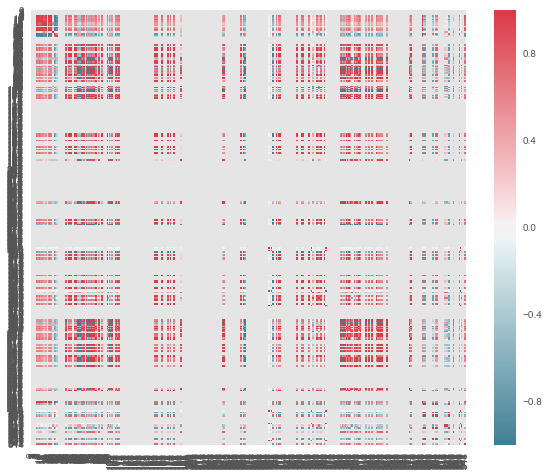

In [736]:
import seaborn as sns

delta_corr = delta.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(delta_corr, mask=np.zeros_like(delta_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [737]:
list_feature= noise_MDF.metrics_list
indices = np.where(delta_corr > 0.7)
indices = [(delta_corr.index[x], delta_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [468]:
for comb in indices:
    print(list_feature[comb[0]], "and", list_feature[comb[1]])

engine_daemon_events_total and engine_daemon_health_checks_total
engine_daemon_events_total and go_gc_duration_seconds_count
engine_daemon_events_total and go_memstats_alloc_bytes_total
engine_daemon_events_total and go_memstats_frees_total
engine_daemon_events_total and go_memstats_last_gc_time_seconds
engine_daemon_events_total and go_memstats_lookups_total
engine_daemon_events_total and go_memstats_mallocs_total
engine_daemon_events_total and process_cpu_seconds_total
engine_daemon_health_checks_total and go_gc_duration_seconds_count
engine_daemon_health_checks_total and go_memstats_alloc_bytes_total
engine_daemon_health_checks_total and go_memstats_frees_total
engine_daemon_health_checks_total and go_memstats_last_gc_time_seconds
engine_daemon_health_checks_total and go_memstats_lookups_total
engine_daemon_health_checks_total and go_memstats_mallocs_total
engine_daemon_health_checks_total and process_cpu_seconds_total
go_gc_duration_seconds_count and go_memstats_alloc_bytes_total
g